### Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling. Specifically generate the following things:

### - Plot the time series, along with any logical or necessary differences to get a stationary dataset
### - Generate and interpret a PACF for the time series (and/or its differences)
### - Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
### - Finally choose one specification and make the case for that as a logical model for your dataset.
### This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

from statsmodels.tsa.arima_model import ARIMA

from pandas import concat

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller

## Data Exploration

In [2]:
df=pd.read_csv('AEP_hourly.csv')

In [3]:
df.head(5)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [4]:
df.columns=['Time','MW']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
Time    121273 non-null object
MW      121273 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [6]:
ts=pd.DataFrame(df['MW'])

## Indexing with Time Series Data

In [7]:
ts=ts.set_index(pd.to_datetime(df['Time']))
ts.head()

,MW
Time,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


## Data Visualization - Original Data

In [8]:
y = ts['MW'].resample('MS').mean()

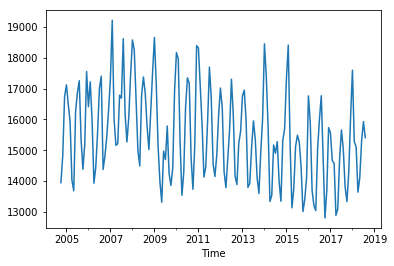

In [9]:
y.plot()
plt.show()

## Data Visualization - Difference Data

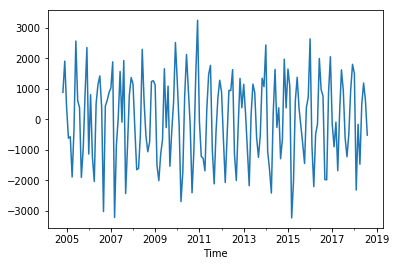

In [10]:
y_diff=y-y.shift()
y_diff=y_diff[1:len(y)]
y_diff.plot()
plt.show()

## PACF - Original Data

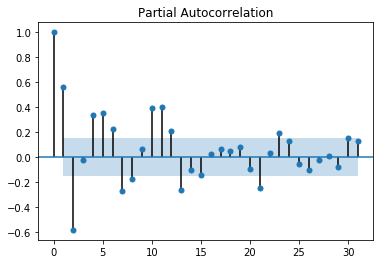

In [11]:
plot_pacf(y, lags=31, alpha=0.05)
plt.show()

### Lag-1 is strongly correlated.

## PACF - Difference Data

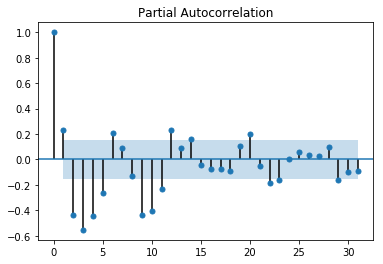

In [12]:
plot_pacf(y_diff, lags=31, alpha=0.05)
plt.show()

### Lag-1 is strongly correlated.

In [13]:
aic_array=[]

In [14]:
def mod(data,dic,ar):
    model=ARIMA(data, order=dic).fit()
    aic_array.append(model.aic)
    print(model.summary())
    print('Residuals Description')
    print(model.resid.describe())

## Model 1

In [15]:
mod(y,(0,1,0),aic_array)

                             ARIMA Model Results                              
Dep. Variable:                   D.MW   No. Observations:                  166
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1435.130
Method:                           css   S.D. of innovations           1375.293
Date:                Sun, 06 Jan 2019   AIC                           2874.260
Time:                        23:56:07   BIC                           2880.484
Sample:                    11-01-2004   HQIC                          2876.786
                         - 08-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7917    106.743      0.082      0.934    -200.422     218.005
Residuals Description
count    1.660000e+02
mean     6.437688e-14
std      1.379455e+03
min     -3.241666e+03
25%     -1.028100e+03

## Model 2

In [16]:
mod(y,(1,1,0),aic_array)

                             ARIMA Model Results                              
Dep. Variable:                   D.MW   No. Observations:                  166
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1430.721
Method:                       css-mle   S.D. of innovations           1339.033
Date:                Sun, 06 Jan 2019   AIC                           2867.442
Time:                        23:56:07   BIC                           2876.778
Sample:                    11-01-2004   HQIC                          2871.232
                         - 08-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6041    134.234      0.072      0.943    -253.489     272.697
ar.L1.D.MW     0.2271      0.075      3.011      0.003       0.079       0.375
                                    Roots           

## Model 3

In [17]:
mod(y,(0,1,1),aic_array)

                             ARIMA Model Results                              
Dep. Variable:                   D.MW   No. Observations:                  166
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1427.162
Method:                       css-mle   S.D. of innovations           1310.367
Date:                Sun, 06 Jan 2019   AIC                           2860.323
Time:                        23:56:07   BIC                           2869.659
Sample:                    11-01-2004   HQIC                          2864.113
                         - 08-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3487    135.506      0.062      0.951    -257.238     273.935
ma.L1.D.MW     0.3344      0.068      4.882      0.000       0.200       0.469
                                    Roots           

## Model 4

In [18]:
mod(y,(1,1,1),aic_array)

                             ARIMA Model Results                              
Dep. Variable:                   D.MW   No. Observations:                  166
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1414.088
Method:                       css-mle   S.D. of innovations           1197.052
Date:                Sun, 06 Jan 2019   AIC                           2836.176
Time:                        23:56:08   BIC                           2848.624
Sample:                    11-01-2004   HQIC                          2841.229
                         - 08-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1840      3.868     -2.375      0.019     -16.765      -1.603
ar.L1.D.MW     0.5119      0.068      7.511      0.000       0.378       0.645
ma.L1.D.MW    -1.0000      0.017    -60.028      0.0

## Model 5

In [19]:
mod(y,(1,1,2),aic_array)

                             ARIMA Model Results                              
Dep. Variable:                   D.MW   No. Observations:                  166
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1396.343
Method:                       css-mle   S.D. of innovations           1074.778
Date:                Sun, 06 Jan 2019   AIC                           2802.686
Time:                        23:56:08   BIC                           2818.246
Sample:                    11-01-2004   HQIC                          2809.002
                         - 08-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4416      3.568     -2.647      0.009     -16.434      -2.449
ar.L1.D.MW     0.2807      0.093      3.031      0.003       0.099       0.462
ma.L1.D.MW    -0.4938      0.068     -7.242      0.0

In [20]:
aic_array

[2874.259826539219,
 2867.442071558697,
 2860.3230006379686,
 2836.1764859967507,
 2802.6860542589184]

In [21]:
aic_array.index(min(aic_array))

4

## Model 5 is the best model since it has the least AIC value.